<a href="https://colab.research.google.com/github/bardiaHSZD/ComputerVisionVFX/blob/main/Ship_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks


---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

## Step 0: Import Datasets and Exploring Images

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [ship dataset](https://github.com/CAESAR-Radi/SAR-Ship-Dataset).  Unzip the folder and place it in this project's home directory, at the location `/ship_dataset`. 

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!sudo unzip '/content/drive/MyDrive/ship_dataset.zip' -d '/content/drive/MyDrive/'

In [ ]:
import numpy as np
from glob import glob

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # added to fix exception IOError: image file truncated” with big images
# load filenames for human and dog images
#dog_files = np.array(glob("/data/dog_images/*/*/*"))
vessel_files = np.array(glob("/content/drive/MyDrive/ship_dataset/*/*/*"))
"""
gao_files = np.array(glob("/content/drive/MyDrive/ship_dataset/Gao/*"))
new_files = np.array(glob("/content/drive/MyDrive/ship_dataset/New/*"))
sen_files = np.array(glob("/content/drive/MyDrive/ship_dataset/Sen/*"))
ship_files = np.array(glob("/content/drive/MyDrive/ship_dataset/Ship/*"))

# print number of images in each dataset
print('There are %d total gao images.' % len(gao_files))
print('There are %d total new images.' % len(new_files))
print('There are %d total sen images.' % len(sen_files))
print('There are %d total ship images.' % len(ship_files))
"""
print('There are %d total ship images.' % len(vessel_files))

There are 39729 total ship images.


In [ ]:
import numpy as np
from glob import glob

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # added to fix exception IOError: image file truncated” with big images
# load filenames for human and dog images
#dog_files = np.array(glob("/data/dog_images/*/*/*"))
vessel_files = np.array(glob("/content/drive/MyDrive/ship_dataset/*/*/*"))
gao_files = np.array(glob("/content/drive/MyDrive/ship_dataset/test/001.Gao/*"))
new_files = np.array(glob("/content/drive/MyDrive/ship_dataset/test/002.Newship/*"))
sen_files = np.array(glob("/content/drive/MyDrive/ship_dataset/test/003.Sen/*"))
ship_files = np.array(glob("/content/drive/MyDrive/ship_dataset/test/004.Ship/**"))

# print number of images in each dataset
print('There are %d total test Gao images.' % len(gao_files))
print('There are %d total test Newship images.' % len(new_files))
print('There are %d total test Sen images.' % len(sen_files))
print('There are %d total test other ship images.' % len(ship_files))
print('There are %d total test ship images.' % len(vessel_files))

There are 2099 total test Gao images.
There are 113 total test Newship images.
There are 2260 total test Sen images.
There are 37 total test other ship images.
There are 39729 total test ship images.


A quick look at the images.

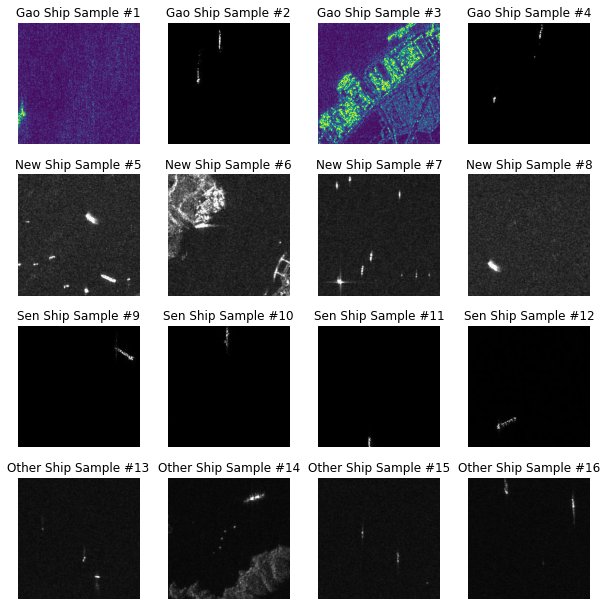

In [ ]:
import matplotlib.pyplot as plt 
from PIL import Image
 
def plot():
    
    # create figure
    fig = plt.figure(figsize=(20, 20))
    # setting values to rows and column variables
    rows = 4
    columns = 4

    for i,k in enumerate(range(1,17)):
        if k <= 4:
            # Adds a subplot at the 1st position
            fig.add_subplot(rows, columns, k)
            plt.title('Gao Ship Sample #'+ str(k))
            # showing image
            img = Image.open(gao_files[i])
            plt.imshow(img)
            plt.axis("off")
        elif k > 4 and k < 9: 
            # Adds a subplot at the 1st position
            fig.add_subplot(rows, columns, k)
            plt.title('New Ship Sample #'+ str(k))
            # showing image
            img = Image.open(new_files[i])
            plt.imshow(img)
            plt.axis("off")
        elif k >= 9 and k < 13: 
            # Adds a subplot at the 1st position
            fig.add_subplot(rows, columns, k)
            plt.title('Sen Ship Sample #'+ str(k))
            # showing image
            img = Image.open(sen_files[i])
            plt.imshow(img)
            plt.axis("off")
        elif k >= 13 and k < 17: 
            # Adds a subplot at the 1st position
            fig.add_subplot(rows, columns, k)
            plt.title('Other Ship Sample #'+ str(k))
            # showing image
            img = Image.open(ship_files[i])
            plt.imshow(img)
            plt.axis("off")                       
            
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25, right = 1, left = 0.6)

    

#Implementation of the function 

plot()

A quick look at pixel intensity of images.

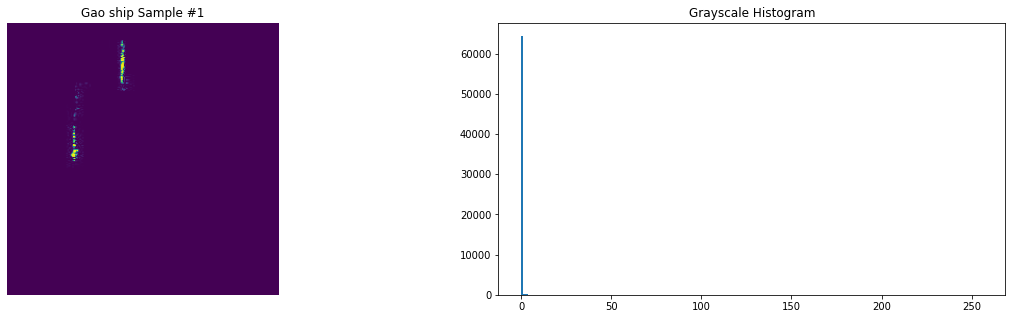

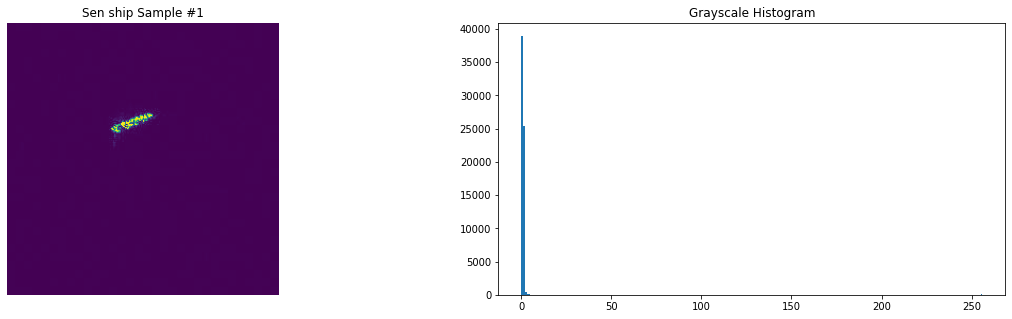

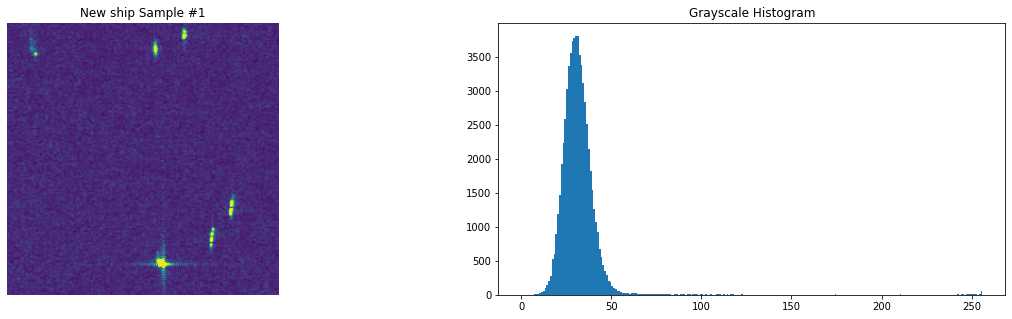

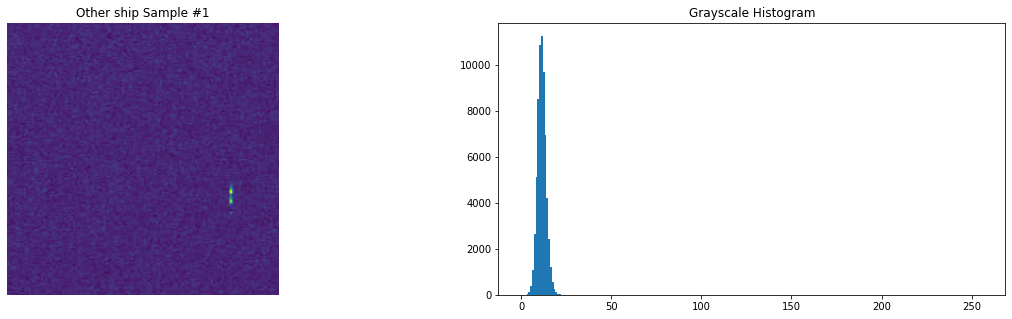

In [ ]:
import cv2                
import matplotlib
import matplotlib.pyplot as plt                        
%matplotlib inline 
from PIL import Image

def plotHistogram(ship, type):

    # create figure
    fig = plt.figure(figsize=(20, 5))
    # setting values to rows and column variables
    rows = 1
    columns = 2

    k = 1
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, k)
    plt.title(type + ' ship Sample #' + str(k))
    # showing image
    plt.axis("off")


    # load color (BGR) image
    img = cv2.imread(ship)
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    plt.imshow(gray)
    #plt.show()

    k = 2
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, k)
    img = cv2.imread(ship, 0)
    plt.hist(img.ravel(), 256, (0, 256))
    plt.title("Grayscale Histogram")
    #,255)
    plt.show()

for i in range (1,2):
    plotHistogram(gao_files[i], "Gao")
    plotHistogram(sen_files[i], "Sen") 
    plotHistogram(new_files[i], "New")
    plotHistogram(ship_files[i], "Other")          

<a id='step1'></a>
## Step 1: Classify Ships

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [ ]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

---
<a id='step2'></a>

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

---
<a id='step3'></a>
### Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/Brittany_02625.jpg?raw=1" width="100"> | <img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/Welsh_springer_spaniel_08203.jpg?raw=1" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/Curly-coated_retriever_03896.jpg?raw=1" width="200"> | <img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/American_water_spaniel_00648.jpg?raw=1" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/Labrador_retriever_06457.jpg?raw=1" width="150"> | <img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/Labrador_retriever_06455.jpg?raw=1" width="240"> | <img src="https://github.com/bardiaHSZD/Dog_Breed_Classifier_CNN/blob/master/images/Labrador_retriever_06449.jpg?raw=1" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [ ]:
import os
import torch
import torchvision.models as models
from torchvision import datasets
from torchvision import utils
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    
transforms = {
    'train' : transforms.Compose([transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(30, resample=False, expand=False, center=None),  
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'valid' : transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    'test' : transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
}


# define dataloader parameters
batch_size = 20
num_workers=0

# define training and test data directories
#data_dir = '/data/dog_images'
data_dir = '/content/drive/MyDrive/ship_dataset/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transforms[x])
                 for x in ['train', 'valid', 'test']}
data_loaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)
               for x in ['train', 'valid', 'test']}

test_loader = torch.utils.data.DataLoader(image_datasets['test'], shuffle=True, batch_size = 20) 
# class names of the training data set
image_classes_names = image_datasets['train'].classes
number_of_image_classes = len(image_classes_names)
print("There are {} classes in the training dataset, and the class names are ...".format(number_of_image_classes))
print(image_classes_names)
# sizes of the image data set dictionary
image_dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}

CUDA is available!  Training on GPU ...


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1249: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


There are 4 classes in the training dataset, and the class names are ...
['001.Gao', '002.Newship', '003.Sen', '004.Ship']


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

i) The images in the training, validation, and test data sets were resized to 256, and center-cropped to 224 by 224 because VGG16 expects 224-dim square images.

ii) Yes I did. RandomHorizontalFlip(), RandomResizedCrop() and RandomRotation were applied to the training dataset to account for different angles the photos taken and orientation of dogs (e.g. lying down, standing up, etc.).

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### DONE: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN (VGG16)
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),  
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),  
            nn.BatchNorm2d(16),
            nn.ReLU(),            
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),  
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
        )  
        
        self.classifier = nn.Sequential(
            nn.Linear(in_features=(12544), out_features=200, bias=True), #????????????????????????????
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=False),#True),
            nn.Linear(in_features=200, out_features=100, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=False),#True),
            nn.Linear(in_features=100, out_features=100, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=False),#True),
            nn.Linear(in_features=100, out_features=50, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=False),#True),
            nn.Linear(in_features=50, out_features=4, bias=True),
        )
        

    def forward(self, x):
        ## Define forward behavior
        x = self.net(x)
        x = x.view(x.size(0), -1)  # reduce the dimensions for linear layer input
        return self.classifier(x)

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

In [ ]:
"""
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### DONE: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN (VGG16)
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),  
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1), 
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1), 
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),  
            nn.BatchNorm2d(256),
            nn.ReLU(),            
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),  
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1), 
            nn.BatchNorm2d(512),
            nn.ReLU(),            
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),            
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            
        )  
        
        self.classifier = nn.Sequential(
            nn.Linear(in_features=(512 * 7 * 7), out_features=4096, bias=True), #????????????????????????????
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=False),#True),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=False),#True),
            nn.Linear(in_features=4096, out_features=4, bias=True),
        )
        

    def forward(self, x):
        ## Define forward behavior
        x = self.net(x)
        x = x.view(x.size(0), -1)  # reduce the dimensions for linear layer input
        return self.classifier(x)

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()
"""    

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

In order to fairly compare the transfer learning with the CNN model from scratch, I decided to use the VGG16 structure, shown above, and train the network with a limitted number of epochs (i.e. 20 epochs), so that the final results would satisfy the 10 percent minimum accuracy on the test results. I used the squential approach to implement the model. 

The VGG16 model accepts 224 squared images in RGB. The Kernel size was chosen to be 3 by 3 with a padding of 1 to maintain the spatial resolution. The conv2d command was used to create the convolutional layers (e.g. the first layer is a convolutional layer that takes the (224, 224, 3) RGB image, and it is defined as: Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)). Each convolutional layer is followed by a batch normalization procedure to normalize the outputs in a unit variance, zero mean scale. Then, a ReLU activation function was used on the normalized data from each convolutional layer. 

Each layer of the CNN network contains an assembly of two or three convolutional layers, and it is followed by a max-pooling step of with a 2 by 2 kernel size and stride of 1 (i.e. MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)).

Finally, the sizes of the the convolutional and the fully connected layers can be determined by:

Convolutional Layers:

([64, 3, 224, 224]) 

([64, 64, 224, 224])

([64, 128, 112, 112])

([128, 128, 112, 112])

([128, 256, 56, 56])

([256, 256, 56, 56])

([256, 256, 56, 56])

([256, 512, 28, 28])

([512, 512, 28, 28])

([512, 512, 28, 28])

([512, 512, 14, 14])

([512, 512, 14, 14])

([512, 512, 14, 14])

Fully Connected Layers:

([512 * 7 * 7, 4096])

([4096, 4096])

([4096, 133])

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [ ]:
import torch.optim as optim

### DONE: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### DONE: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
def train(n_epochs, train_loader, valid_loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # parameter update
            optimizer.step()
            # update training loss
            train_loss += loss.item() * data.size(0)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass
            output = model(data)
            # batch loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
            
        average_training_loss = train_loss / (len(train_loader.dataset)+1)
        average_validation_loss = valid_loss / (len(valid_loader.dataset)+1)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            average_training_loss,
            average_validation_loss
            ))
        
        ## DONE: save the model if validation loss has decreased
        if average_validation_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} to {:.6f}).    Saving model...'.
                 format(valid_loss_min, average_validation_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = average_validation_loss
            
    # return trained model
    return model


# train the model
n_epochs = 100


In [ ]:
#loader_scratch = data_loaders['train']
torch.autograd.set_detect_anomaly(True)
model_scratch = train(n_epochs, data_loaders['train'], data_loaders['valid'], model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, '/content/drive/MyDrive/outmodel_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('/content/drive/MyDrive/outmodel_scratch.pt'))

Epoch: 1 	Training Loss: 0.021875 	Validation Loss: 6.639639
Validation loss decreased (inf to 6.639639).    Saving model...
Epoch: 2 	Training Loss: 0.020563 	Validation Loss: 0.070247
Validation loss decreased (6.639639 to 0.070247).    Saving model...
Epoch: 3 	Training Loss: 0.040883 	Validation Loss: 2.687114
Epoch: 4 	Training Loss: 0.025774 	Validation Loss: 0.798907
Epoch: 5 	Training Loss: 0.043031 	Validation Loss: 0.050105
Validation loss decreased (0.070247 to 0.050105).    Saving model...
Epoch: 6 	Training Loss: 0.023562 	Validation Loss: 0.047960
Validation loss decreased (0.050105 to 0.047960).    Saving model...
Epoch: 7 	Training Loss: 0.022844 	Validation Loss: 0.275662
Epoch: 8 	Training Loss: 0.022209 	Validation Loss: 0.088959
Epoch: 9 	Training Loss: 0.021177 	Validation Loss: 0.372150
Epoch: 10 	Training Loss: 0.019197 	Validation Loss: 0.123008
Epoch: 11 	Training Loss: 0.021759 	Validation Loss: 0.035123
Validation loss decreased (0.047960 to 0.035123).    Sav

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [ ]:
import os
import numpy as np
import torch
import torchvision.models as models
from torchvision import datasets
from torchvision import utils
import torchvision.transforms as transforms

import torch
torch.cuda.empty_cache()

import torch
import pandas as pd
import numpy as np

# load the model that got the best validation accuracy

model_scratch.load_state_dict(torch.load('/content/drive/MyDrive/outmodel_scratch.pt'))
def test(loaders, model, criterion, use_cuda):

    test_loss = 0.0
    correct = 0.0
    total = 0.0
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        print("Processed: Batch ID# ", batch_idx)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

        #y_true = torch.cat((y_true,target.cpu()))
        pd.DataFrame(target.cpu().detach().numpy()).to_csv('/content/drive/MyDrive/y_true.csv', mode='a', header=False) #torch.cat((y_pred,output.cpu()))   

        pd.DataFrame((output.cpu().detach().numpy())).to_csv('/content/drive/MyDrive/y_pred.csv', mode='a', header=False) #torch.cat((y_pred,output.cpu()))   
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % ( 100. * correct / total, correct, total))


# call test function
model_scratch.load_state_dict(torch.load('/content/drive/MyDrive/outmodel_scratch.pt'))
test(test_loader, model_scratch, criterion_scratch, use_cuda)

Processed: Batch ID#  0
Processed: Batch ID#  1
Processed: Batch ID#  2
Processed: Batch ID#  3
Processed: Batch ID#  4
Processed: Batch ID#  5
Processed: Batch ID#  6
Processed: Batch ID#  7
Processed: Batch ID#  8
Processed: Batch ID#  9
Processed: Batch ID#  10
Processed: Batch ID#  11
Processed: Batch ID#  12
Processed: Batch ID#  13
Processed: Batch ID#  14
Processed: Batch ID#  15
Processed: Batch ID#  16
Processed: Batch ID#  17
Processed: Batch ID#  18
Processed: Batch ID#  19
Processed: Batch ID#  20
Processed: Batch ID#  21
Processed: Batch ID#  22
Processed: Batch ID#  23
Processed: Batch ID#  24
Processed: Batch ID#  25
Processed: Batch ID#  26
Processed: Batch ID#  27
Processed: Batch ID#  28
Processed: Batch ID#  29
Processed: Batch ID#  30
Processed: Batch ID#  31
Processed: Batch ID#  32
Processed: Batch ID#  33
Processed: Batch ID#  34
Processed: Batch ID#  35
Processed: Batch ID#  36
Processed: Batch ID#  37
Processed: Batch ID#  38
Processed: Batch ID#  39
Processed:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

df_y_pred = pd.read_csv('/content/drive/MyDrive/y_pred.csv').iloc[:,1:]
df_y_true = pd.read_csv('/content/drive/MyDrive/y_true.csv')
y_pred = (df_y_pred.apply(lambda x: x.argmax(), axis=1)).values
y_true = df_y_true.iloc[:,1:].values.squeeze()

target_names = ['Gao Ship', 'New Ship', 'Sen Ship', 'Other Ship']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    Gao Ship       0.81      0.98      0.89     10861
    New Ship       0.76      0.99      0.86       586
    Sen Ship       0.98      0.79      0.87     11680
  Other Ship       0.00      0.00      0.00       188

    accuracy                           0.88     23315
   macro avg       0.64      0.69      0.65     23315
weighted avg       0.89      0.88      0.87     23315



Evaluation:


---
<a id='step5'></a>
## Step 2: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

In [ ]:
### DONE: Write your algorithm.
### Feel free to use as many code cells as needed.
## handle cases for a human face, dog, and neither
import random
import matplotlib.pyplot as plt                        

human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

def show_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

def show_breed(label):
    subdir = ''.join(['/data/dog_images/valid/', label + '/'])
    file = random.choice(os.listdir(subdir))
    path = ''.join([subdir, file])
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

def run_app(img_path):
    breed_name, full_breed_name, probability = predict_breed_transfer(img_path)
    
    if probability[0] > 0.3:
        print("A dog is detected ...")
        show_image(img_path)
        print("The predicted breeds is {0}, with an associated probability of %{1:.2f}:\n".format(breed_name[0], probability[0]*100))     
        show_breed(full_breed_name[0])
    
    elif face_detector(img_path):
        print("Hello, human!")
        show_image(img_path)
        print("You look like a  ... \n")
        print("{0}, with an associated probability of %{1:.2f}:\n".format(breed_name[0], probability[0]*100))     
        show_breed(full_breed_name[0])
    else:
        print("Oh no! Neither a human nor a dog was detected!\n")
        show_image(img_path)

---
<a id='step6'></a>


In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Three possible improvements can be proposed as:
 
i) Using sub-plots to show top 3 (or 5) breed probabilities for better demonstration of the breeed detection.

ii) Reducing code repetition cases and including them intoe functions, wehere possible

iii) Handling multiple dogs and/or human in a single image

iv) Generalizing the output 

Hello, human!


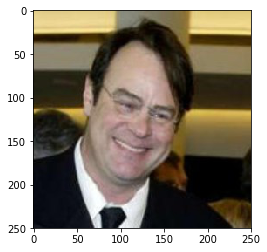

You look like a  ... 

Dogue de bordeaux, with an associated probability of %1.87:



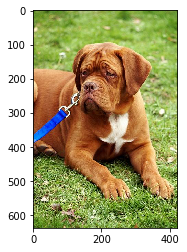

Hello, human!


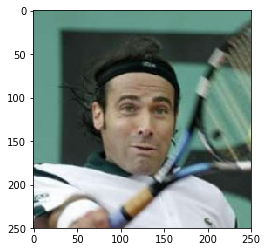

You look like a  ... 

Bearded collie, with an associated probability of %2.45:



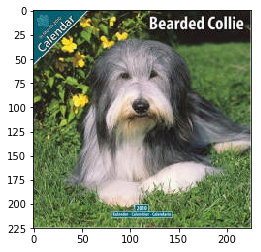

Hello, human!


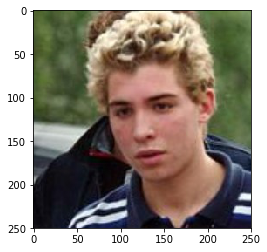

You look like a  ... 

Wirehaired pointing griffon, with an associated probability of %2.06:



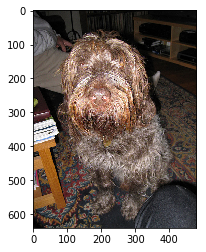

Hello, human!


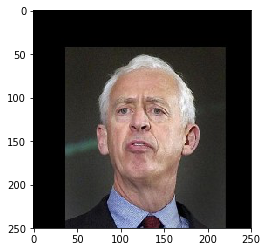

You look like a  ... 

Wirehaired pointing griffon, with an associated probability of %2.59:



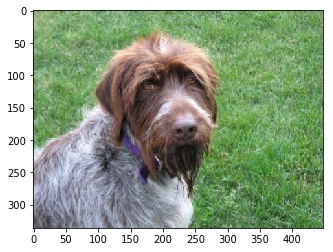

Hello, human!


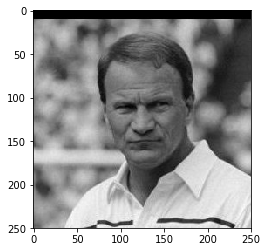

You look like a  ... 

Wirehaired pointing griffon, with an associated probability of %1.78:



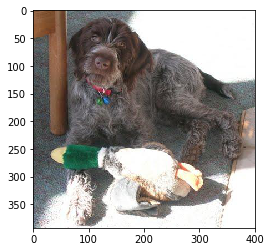

Hello, human!


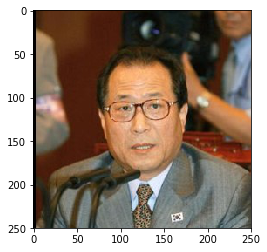

You look like a  ... 

Field spaniel, with an associated probability of %1.74:



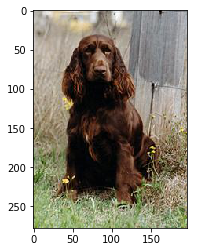

A dog is detected ...


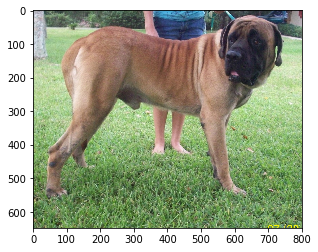

The predicted breeds is Bullmastiff, with an associated probability of %50.58:



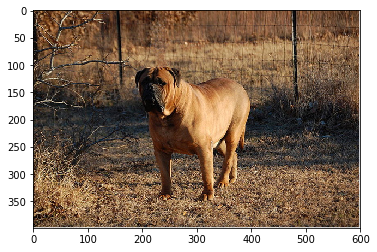

A dog is detected ...


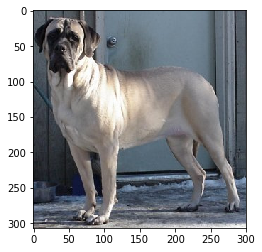

The predicted breeds is Mastiff, with an associated probability of %34.17:



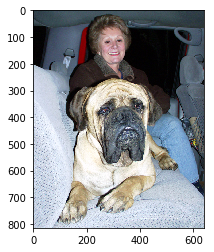

A dog is detected ...


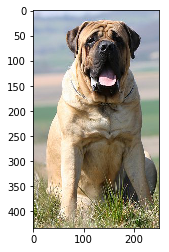

The predicted breeds is Bullmastiff, with an associated probability of %39.82:



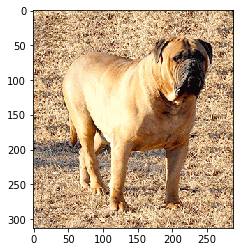

A dog is detected ...


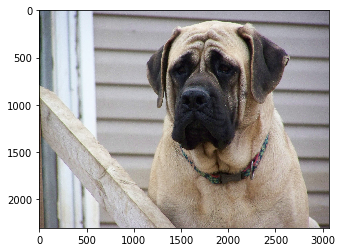

The predicted breeds is Bullmastiff, with an associated probability of %52.15:



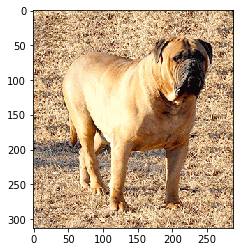

A dog is detected ...


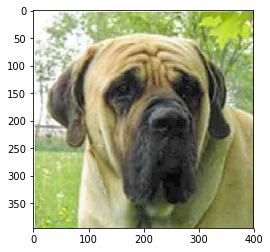

The predicted breeds is Mastiff, with an associated probability of %46.21:



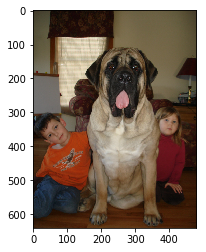

A dog is detected ...


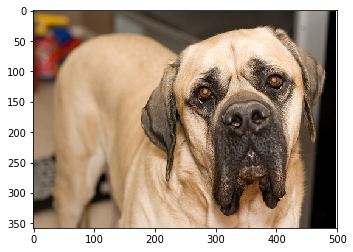

The predicted breeds is Mastiff, with an associated probability of %74.18:



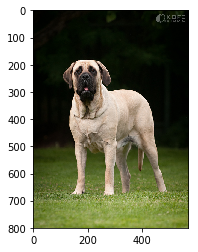

In [ ]:
## DONE: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:6], dog_files[:6])):
    run_app(file)

##**Step 3: Pre-process Data via Segmentation**

###**Step 3-1: The Overview**

In [22]:
sample_data_file_name = '/content/drive/MyDrive/ship_dataset/train/001.Gao/Gao_ship_hh_02018031993020408.jpg'
#'/content/drive/MyDrive/ship_detection/Sen_ship_hh_020161127030806.jpg'#'/content/drive/MyDrive/ship_detection/1056417_2017-03-08_RE3_3A_Visual_clip.tiff'

(256, 256)


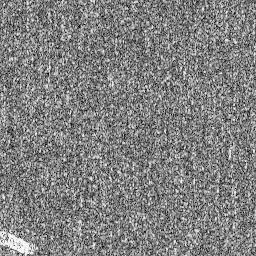

In [23]:
import skimage.io
from IPython.display import Image
# Read image into scimage package
img = skimage.io.imread(sample_data_file_name[:-4]+'.jpg')
skimage.io.imsave('/content/drive/MyDrive/ship_detection/output/original.png', img)
print(img.shape)
# Display original image
display(Image(filename='/content/drive/MyDrive/ship_detection/output/original.png'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: /content/drive/MyDrive/ship_detection/output/mask.png is a low contrast image


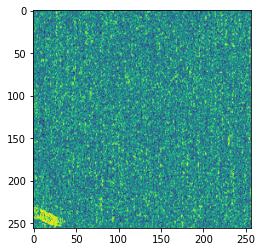

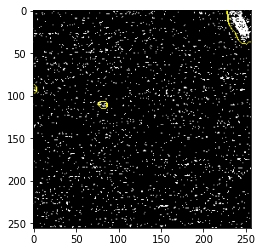

Ship 1: 


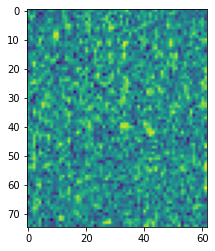

Ship 2: 


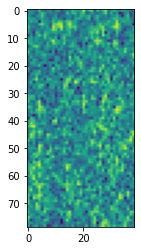

Ship 3: 


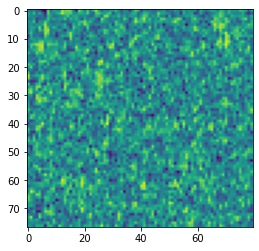

In [24]:
import json
import gdal
import osr
import numpy
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import os
import glob

files = glob.glob('/content/drive/MyDrive/ship_detection/output/*')
for f in files:
    os.remove(f)

# Open image with gdal
ds = gdal.Open(sample_data_file_name)
xoff, a, b, yoff, d, e = ds.GetGeoTransform()

# Get projection information from source image
ds_proj = ds.GetProjectionRef()
ds_srs = osr.SpatialReference(ds_proj)

# Get the source image's geographic coordinate system (the 'GEOGCS' node of ds_srs)
geogcs = ds_srs.CloneGeogCS()

# Set up a transformation between projected coordinates (x, y) & geographic coordinates (lat, lon)
transform = osr.CoordinateTransformation(ds_srs, geogcs)

# Convert multi-channel image it into red, green and blueb[, alpha] channels 

if len(img.shape) == 3:
  red, green, blue = numpy.rollaxis(numpy.array(img), axis=-1)
  alpha = red
else:
  red = numpy.rollaxis(numpy.array(img), axis=-1)
  alpha = red

# Mask: threshold + stops canny detecting image boundary edges
mask = red > 200

# Create mask for edge detection
skimage.io.imsave('/content/drive/MyDrive/ship_detection/output/mask.png', mask * 255)

# Use Felzenszwalb algo to find segements
segments_fz = felzenszwalb(numpy.dstack((mask, mask, mask)),
                               scale=5000,
                               sigma=3.1,
                               min_size=25) 

# Build labeled mask to show where ships were dectected
segmented_img = mark_boundaries(mask, segments_fz)
skimage.io.imsave('/content/drive/MyDrive/ship_detection/output/mask_labeled.png', segmented_img)


# Preserve the bounding box for display of copped immages
bounding_boxes = []


# Count ships and save image of each boat clipped from masked image
for idx, ship in enumerate(regionprops(segments_fz)):
    # If area matches that of a stanard ship, count it
    if (ship.area >= 10 and ship.area <= 1000):
        
        # Create ship thumbnail
        x, y = (int(numpy.average([ship.bbox[0],
                                ship.bbox[2]])),
                                int(numpy.average([ship.bbox[1],
                                ship.bbox[3]])))
        sx, ex = max(ship.bbox[0]-35,0), min(ship.bbox[2]+35,img.shape[0] - 1)#max(x - 15, 0), min(x + 15, img.shape[0] - 1)
        sy, ey = max(ship.bbox[1]-35,0), min(ship.bbox[3]+35,img.shape[1] - 1)#max(y - 15, 0), min(y + 15, img.shape[1] - 1)
        img_ship = img[sx:ex, sy:ey]
        bounding_boxes.append({
            'x1': ship.bbox[0],
            'x2': ship.bbox[2],
            'y1': ship.bbox[1],
            'y2': ship.bbox[3]})
        skimage.io.imsave('/content/drive/MyDrive/ship_detection/output/ship-%s.png' % str(idx), img_ship)

        # Get global coordinates from pixel x, y coords
        projected_x = float(a * y + b * x + xoff)
        projected_y = float(d * y + e * x + yoff)

        

# Display results
# Display the image
from PIL import Image
plt.imshow(Image.open(sample_data_file_name))
plt.show()

# Display labled mask where we detected ships
plt.imshow(Image.open('/content/drive/MyDrive/ship_detection/output/mask_labeled.png'))
plt.show()
# Display each individual ship cropped out of the original image
import glob
number = 1
for filepath in glob.iglob('/content/drive/MyDrive/ship_detection/output/ship*.png'):
    print('Ship {}: '. format(number))
    number += 1
    plt.imshow(Image.open(filepath))
    plt.show()    

Remove previous files from train, validation, and test folders 

In [35]:
def clearDirectories():
  import glob

  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/train/001.Gao/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/valid/001.Gao/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/test/001.Gao/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/train/002.Newship/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/valid/002.Newship/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/test/002.Newship/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/train/003.Sen/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/valid/003.Sen/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/test/003.Sen/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/train/004.Ship/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/valid/004.Ship/*')
  for f in files:
      os.remove(f)
  files = glob.glob('/content/drive/MyDrive/ship_detection_segmented/test/004.Ship/*')
  for f in files:
      os.remove(f)

###**Step 3-2: Prepare Detected Images for Classification**

In [42]:
import skimage.io
from IPython.display import Image

import json
import gdal
import osr
import numpy
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import os
import glob


def prepareCroppedImages(source_folder, sample_data_file_name, file_format, output_folder, ship_type):

  # Clear existing files in destination folders
  clearDirectories()

  # Read image into scimage package
  img = skimage.io.imread(source_folder+'/'+sample_data_file_name+file_format)


  skimage.io.imsave(output_folder+'/original.png', img)

  # Open image with gdal
  ds = gdal.Open(source_folder+'/'+sample_data_file_name+file_format)
  xoff, a, b, yoff, d, e = ds.GetGeoTransform()

  # Get projection information from source image
  ds_proj = ds.GetProjectionRef()
  ds_srs = osr.SpatialReference(ds_proj)

  # Get the source image's geographic coordinate system (the 'GEOGCS' node of ds_srs)
  geogcs = ds_srs.CloneGeogCS()

  # Set up a transformation between projected coordinates (x, y) & geographic coordinates (lat, lon)
  transform = osr.CoordinateTransformation(ds_srs, geogcs)

  # Convert multi-channel image it into red, green and blueb[, alpha] channels 

  if len(img.shape) == 3:
    red, green, blue = numpy.rollaxis(numpy.array(img), axis=-1)
    alpha = red
  else:
    red = numpy.rollaxis(numpy.array(img), axis=-1)
    alpha = red
  # Mask: threshold + stops canny detecting image boundary edges
  mask = red > 150

  # Create mask for edge detection
  skimage.io.imsave(output_folder+'/mask.png', mask * 255)

  # Use Felzenszwalb algo to find segements
  segments_fz = felzenszwalb(numpy.dstack((mask, mask, mask)),
                                scale=5000,
                                sigma=3.1,
                                min_size=25) 

  # Build labeled mask to show where ships were dectected
  segmented_img = mark_boundaries(mask, segments_fz)
  skimage.io.imsave(output_folder+'/mask_labeled.png', segmented_img)


  # Preserve the bounding box for display of copped immages
  bounding_boxes = []


  # Count ships and save image of each boat clipped from masked image
  for idx, ship in enumerate(regionprops(segments_fz)):
      # If area matches that of a stanard ship, count it
      if (ship.area >= 10 and ship.area <= 10000):
          
          
          # Create ship thumbnail
          x, y = (int(numpy.average([ship.bbox[0],
                                  ship.bbox[2]])),
                                  int(numpy.average([ship.bbox[1],
                                  ship.bbox[3]])))
          sx, ex = max(ship.bbox[0]-35,0), min(ship.bbox[2]+35,img.shape[0] - 1)#max(x - 15, 0), min(x + 15, img.shape[0] - 1)
          sy, ey = max(ship.bbox[1]-35,0), min(ship.bbox[3]+35,img.shape[1] - 1)#max(y - 15, 0), min(y + 15, img.shape[1] - 1)
          img_ship = img[sx:ex, sy:ey]
          bounding_boxes.append({
              'x1': ship.bbox[0],
              'x2': ship.bbox[2],
              'y1': ship.bbox[1],
              'y2': ship.bbox[3]})
          skimage.io.imsave(output_folder+'/'+sample_data_file_name+'_ship-%s.png' % str(idx), img_ship)

          # Get global coordinates from pixel x, y coords
          projected_x = float(a * y + b * x + xoff)
          projected_y = float(d * y + e * x + yoff)
  return bounding_boxes          

In [45]:
import warnings
warnings.filterwarnings("ignore")

source_folder = '/content/drive/MyDrive/ship_detection/'#'/content/drive/MyDrive/ship_dataset/train/001.Gao'
output_folder = '/content/drive/MyDrive/ship_detection_segmented/train/003.Sen'#'/content/drive/MyDrive/ship_detection_segmented/train/001.Gao'

files = glob.glob(source_folder+'/*')
counter = 0
sample_data_file_name = 'Sen_ship_hh_020161127030806.jpg'#''
#for path in files:
#    sample_data_file_name = os.path.basename(path)
    #print(sample_data_file_name[:-4])
file_format = '.jpg'

prepareCroppedImages(source_folder = source_folder, 
                     sample_data_file_name = sample_data_file_name[:-4],
                     file_format = '.jpg', 
                     output_folder = output_folder, 
                     ship_type = 'Sen')

[{'x1': 44, 'x2': 59, 'y1': 203, 'y2': 215},
 {'x1': 56, 'x2': 71, 'y1': 67, 'y2': 74},
 {'x1': 172, 'x2': 219, 'y1': 122, 'y2': 145},
 {'x1': 182, 'x2': 231, 'y1': 41, 'y2': 56},
 {'x1': 198, 'x2': 209, 'y1': 0, 'y2': 16},
 {'x1': 217, 'x2': 256, 'y1': 189, 'y2': 196},
 {'x1': 237, 'x2': 245, 'y1': 76, 'y2': 89}]